<a href="https://colab.research.google.com/github/LaloGarces/Blockchain-with-Python/blob/main/Creating_a_Blockchain_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a basic Blockchain with Python 

 **The blockchain algorithm to be used in this chain, is going to be the proof of work SHA256.**

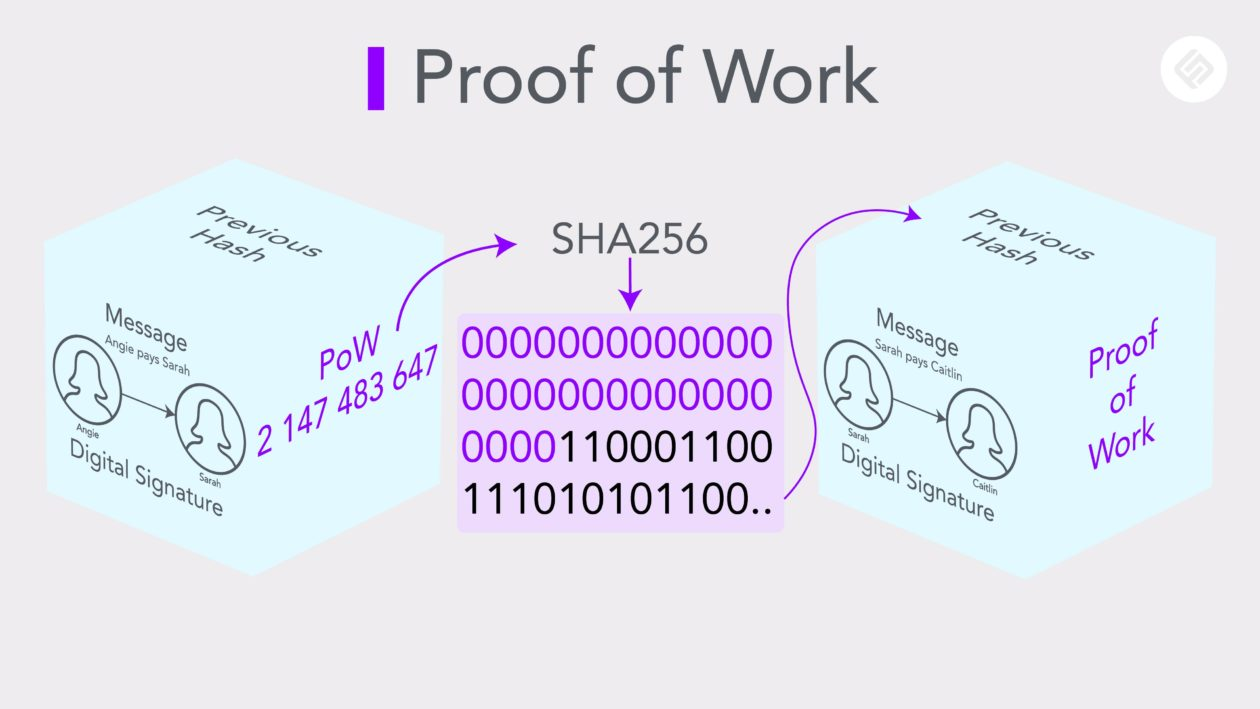

In [ ]:
#Install Flask 0.12.2 that contain the Blockchain
!pip install flask==0.12.2 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 480 kB/s 
  Attempting uninstall: flask
    Found existing installation: Flask 1.1.4
    Uninstalling Flask-1.1.4:
      Successfully uninstalled Flask-1.1.4


In [ ]:
pip install --upgrade Flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 3.1 MB/s 
     |████████████████████████████████| 96 kB 5.4 MB/s 
     |████████████████████████████████| 232 kB 63.4 MB/s 
     |████████████████████████████████| 133 kB 49.4 MB/s 
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 1.0.1
    Uninstalling Werkzeug-1.0.1:
      Successfully uninstalled Werkzeug-1.0.1
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting 

## Importing the libraries

In [ ]:
import datetime #--> To get from each block a time stamp
import hashlib #--> Hash the block
import json    #--> For encode the block before to hash it
from flask import Flask, jsonify #To receive in postman the responses of the request

## Start building the Blockchain

In [ ]:
#Developed in class due all the capabilities within class
#A class function with 2 variables

class Blockchain:
  def __init__(self):
      self.chain = []                                      #--> The chain within the block (Variable 1)
      self.create_block(proof = 1, previous_hash = '0')    #--> Creating the genesis block (Variable 2)

  def create_block(self, proof, previous_hash):            #--> Proof & previous hash 
      block = {'index': len(self.chain) + 1,
               'timestamp': str(datetime.datetime.now()),  #--> Time of the creation of the block
               'proof': proof,
               'previous_hash': previous_hash}

      self.chain.append(block)
      return block

  def get_previous_block(self):
      return self.chain[-1]                                 #--> To receive the last index of the chain

#Developing the Proof of Work (PoW) = proof

  def proof_of_work(self, previous_proof):
      new_proof = 1                                         #--> Iteration by 1 until we get the right proof (Trail & error approach)
      check_proof = False                                   #--> While loop of the proof
      while check_proof is False:
          hash_operation = hashlib.sha256(str(new_proof**2 - previous_proof**2).encode()).hexdigest()
          if hash_operation[:4] == '0000':                  #--> Representing the 4 zeros of the beginning of the block
            check_proof = True
          else:
              new_proof +=1
      return new_proof

  def hash(self, block):
        encoded_block = json.dumps(block, sort_keys = True).ecode()
        return hashlib.sha256(encoded_block).hexdigest()    #--> Hexadecimal format


  def is_chain_valid(self, chain):                          #--> To check if the blockchain is valid
        previous_block = chain[0]
        block_index = 1                                     #--> The number of de block defined in the block dictionary  
        while block_index < len(chain):
            block = chain[block_index]                      #--> The first block
            if block['previous_hash'] != self.hash(previous_block):  #--> If the previous hash of the current block is different of the hash of the previous block return false
                return False
            previous_proof = previous_block['proof']
            proof = block['proof']
            hash_operation = hashlib.sha256(str(proof**2 - previous_proof**2).encode()).hexdigest()
            if hash_operation[:4] != '0000':                #--> To validate that the operation start with 4 zeros.
                return False
            previous_block = block
            block_index += 1
        return True

In [ ]:
#To verify the encode function in hash_operation

#import hashlib

#previous_proof = 2
#new_proof = 3

#new_proof**2 - previous_proof**2

5

In [ ]:
#str(new_proof**2 - previous_proof**2)

'5'

In [ ]:
#str(new_proof**2 - previous_proof**2).encode()

b'5'

# Start mining Blockchain 

Flask to make requests to mine the blocks.

In [ ]:
app = Flask(__name__)

### Creating a Blockchain

In [ ]:
blockchain = Blockchain() #--> All the class done before in the previous section, here takes action. 

### Mining the new Block

**Returning to Flask Documentation in Minimal Application:**

So what did that code do?

1.   First i imported the Flask class. An instance of this class will be  WSGI application. ----> DONE

2.   Next i create an instance of this class. The first argument is the name of the application’s module or package. __name__ is a convenient shortcut for this that is appropriate for most cases. This is needed so that Flask knows where to look for resources such as templates and static files. ----> DONE

3.   i then use the route() decorator to tell Flask what URL should trigger function.

4.    The function returns the message we want to display in the user’s browser. The default content type is HTML, so HTML in the string will be rendered by the browser.

In [ ]:
# going to the point #3 of the Flask Documentation. Function = Mine a Block.
@app.route('/mine_block', methods = ['GET'])   # --> HTTP Method to get a response
def mine_block():
    previous_block = blockchain.get_previous_block    #--> Getting the previous block of the chain
    previous_proof = previous_block['Proof']          #--> Solving the Proof of Work problem with PoW Function
    proof = blockchain.proof_of_work(previous_proof)
    previous_hash = blockchain.hash(previous_block)
    block = blockchain.create_block(proof, previous_hash)
    response = {'message': 'You just have mined succesfully a block!',   #--> Message to the miner after mined a block
                'index': block['index'],
                'timestamp': block['timestamp'],
                'proof': block['proof'],
                'previous_hash': block['previous_hash']}
    return jsonify(response), 200      #--> HTTP Codes, 200 = OK 2xx success

### Getting the full Blockchain

In [ ]:
from werkzeug.wrappers import response
@app.route('/get_chain', methods = ['GET'])
def get_chain():
  response = {'chain': blockchain.chain,
              'length': len(blockchain.chain)}
  return jsonify(response), 200

### Checking if the Blockchain is valid

In [ ]:
@app.route('/is_valid', methods = ['GET'])
def is_valid():
    is_valid = blockchain.is_chain_valid(blockchain.chain)
    if is_valid:
      response = {'message': 'We have a valid Blockchain'}
    else:
      response = {'message': 'The Blockchain is not valid'}
    return jsonify(response), 200

# Running the App

In [ ]:
app.run(host='0.0.0.0', port= 5000)  #--> From Flask documentation: $ flask run --host=0.0.0.0, Running on http://127.0.0.1:5000

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.2:5000
INFO:werkzeug:Press CTRL+C to quit


run in postman the next URL provided by Flask documentation. 
Depending on the results we want to see, we're going to change between:



1.   Mine a Block: /mine_block
2.   Get the chain: /get_chain



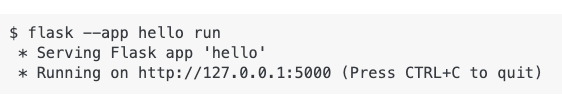

## Results

Getting the Genesis Block (First Block)

I changed the server to 500, due I has running some errors with 5000

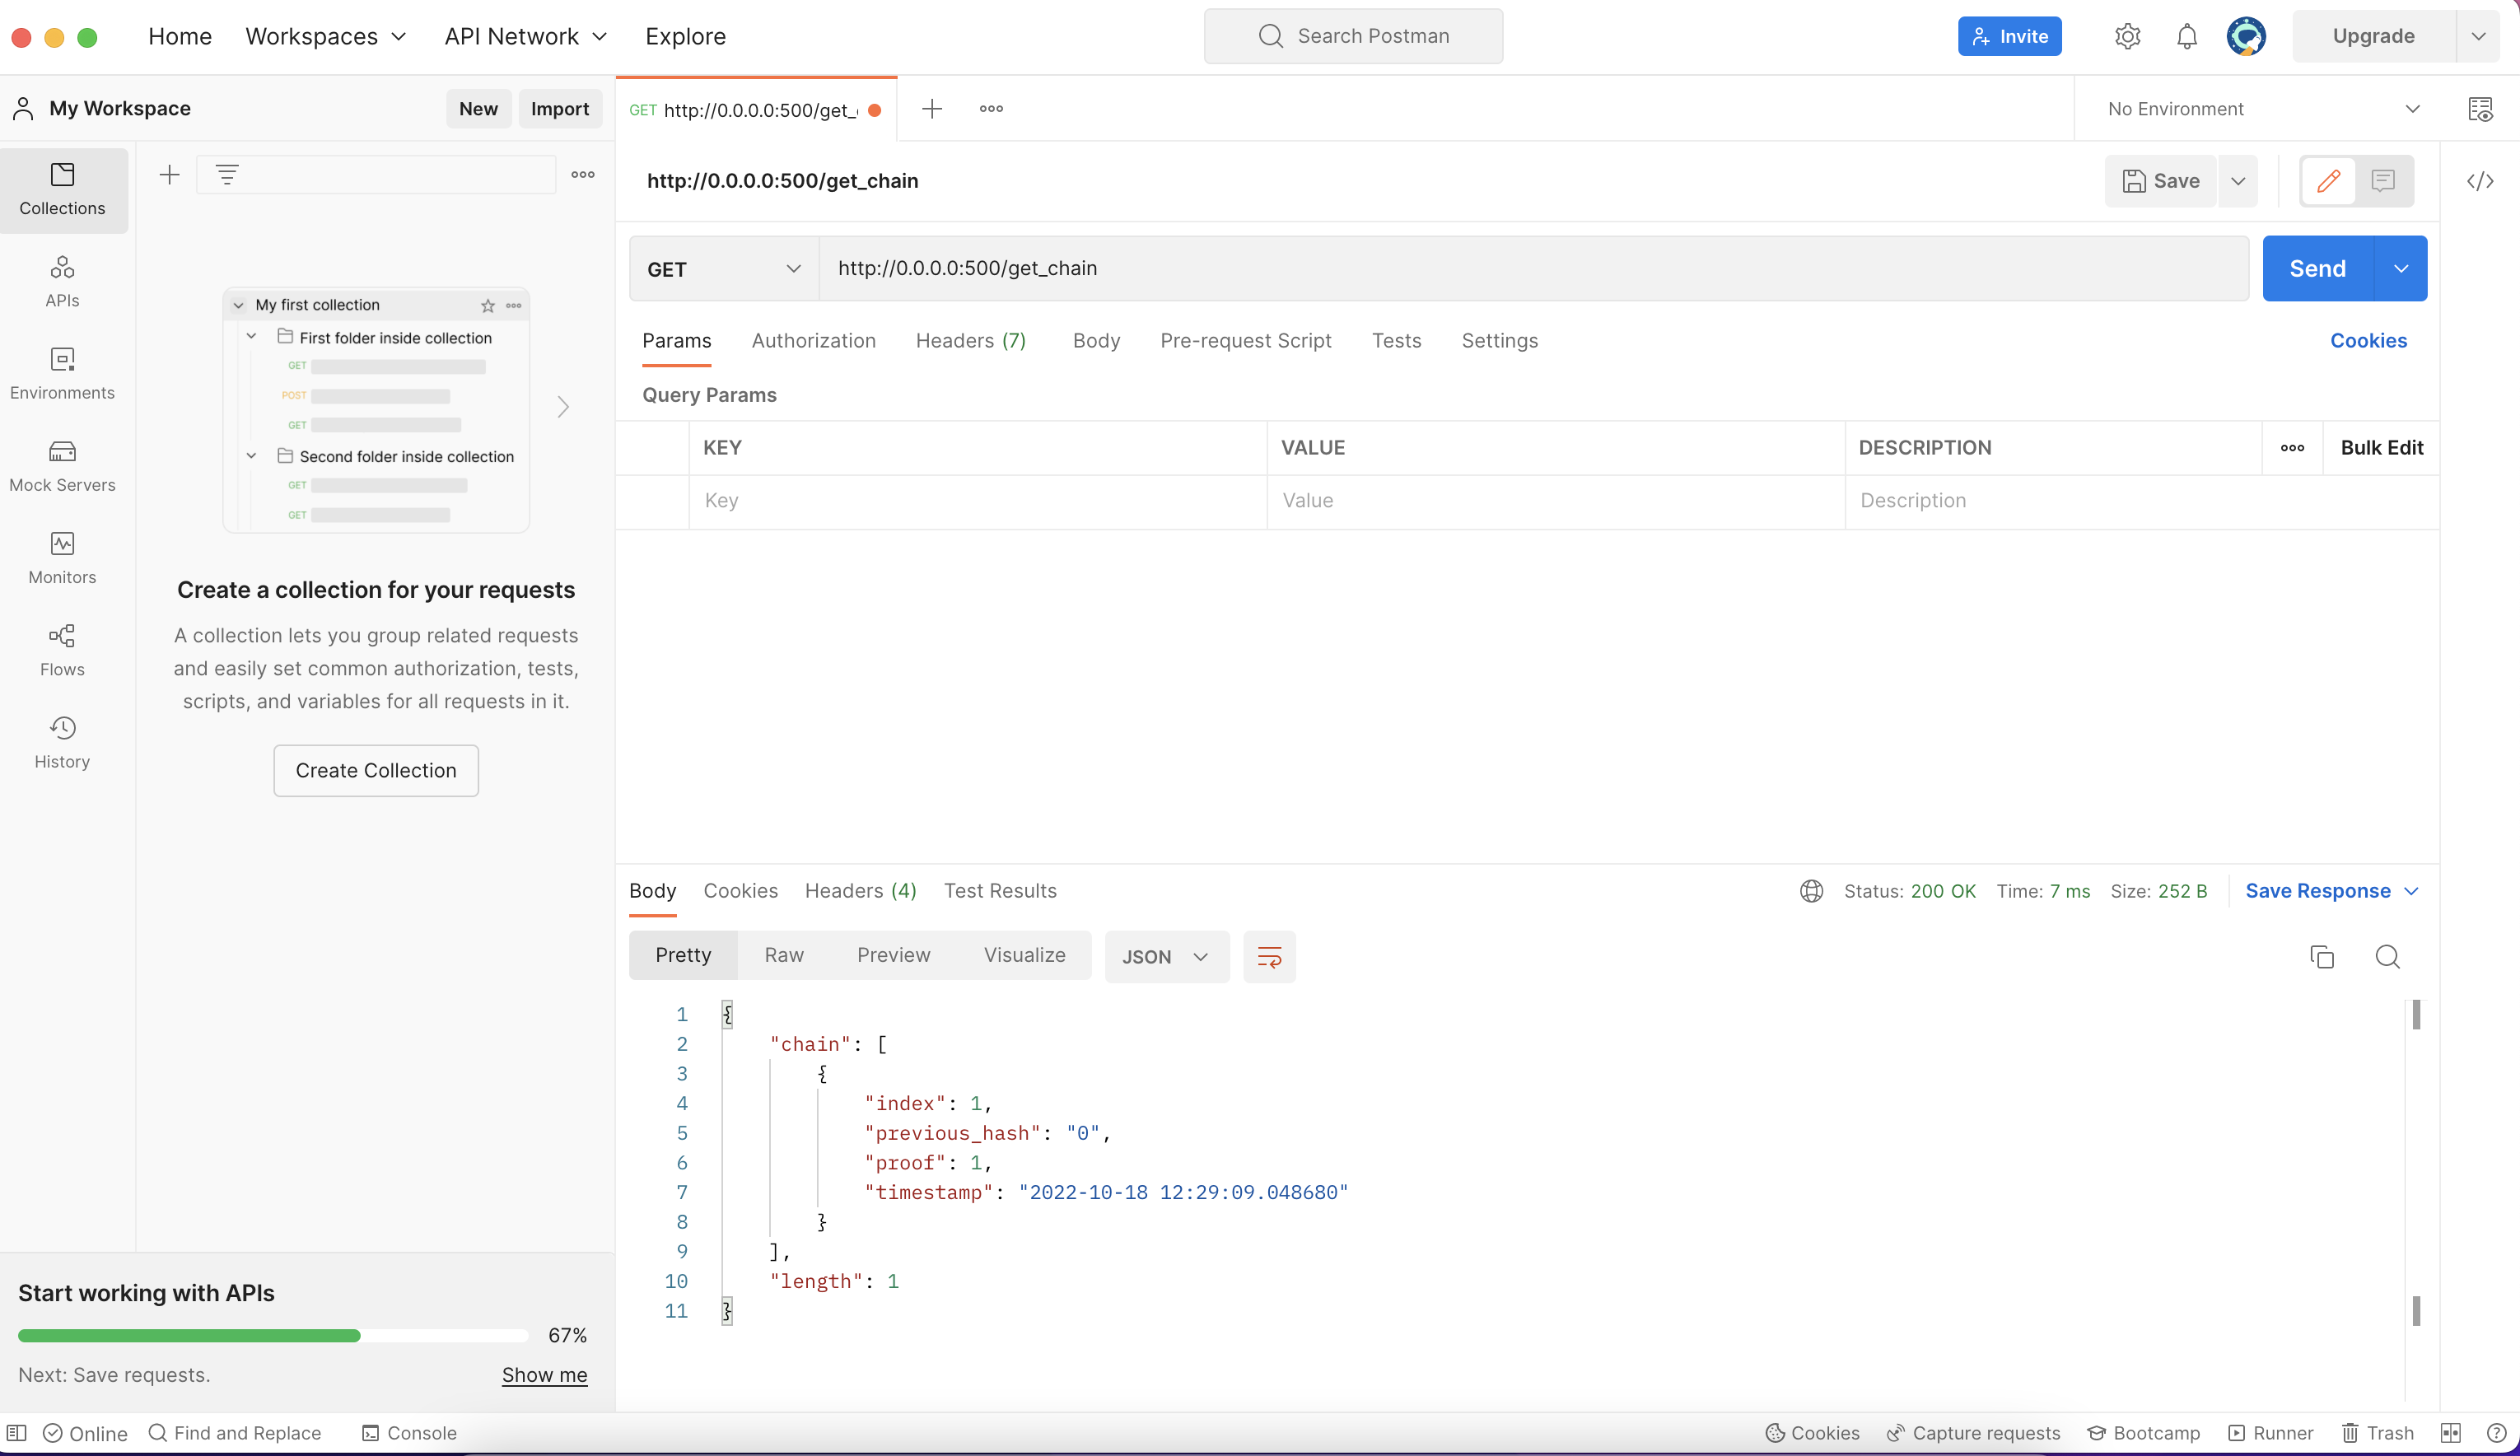

In [ ]:
#Results after mining 7 Blocks
{
    "chain": [
        {
            "index": 1,
            "previous_hash": "0",
            "proof": 1,
            "timestamp": "2025-4-18 12:29:09.048680"
        },
        {
            "index": 2,
            "previous_hash": "e85fc637a138b6575be5344322b9d666f2c4a226e2624fe4bc785a1d5e32fdd5",
            "proof": 533,
            "timestamp": "2025-4-18 12:33:57.577925"
        },
        {
            "index": 3,
            "previous_hash": "151701b6081645981c9af67bb26c0e4eb4637aea2cbc3842e22a2455d6e0453b",
            "proof": 45293,
            "timestamp": "2025-4-18 12:36:32.438224"
        },
        {
            "index": 4,
            "previous_hash": "66382bbab5cbe1df77526584a375a2b1f9315682b0ec40219b6964ae2360f0d3",
            "proof": 21391,
            "timestamp": "2025-4-18 12:36:33.290545"
        },
        {
            "index": 5,
            "previous_hash": "018d8254386a167a1b43977014fbae76e00364171faec9c757ce2544034b8a16",
            "proof": 8018,
            "timestamp": "2025-4-18 12:36:34.032219"
        },
        {
            "index": 6,
            "previous_hash": "837e23c14624306641bc4ae3913be55800ca25c0b7569b9ce9c29b9e8c04621c",
            "proof": 48191,
            "timestamp": "2025-4-18 12:36:34.994703"
        },
        {
            "index": 7,
            "previous_hash": "a8859d00f5269bb96af721c66c2fd46cdeef51b693f9025a3ce939ae82d1fbf9",
            "proof": 19865,
            "timestamp": "2025-4-18 12:36:35.658929"
        }
    ],
    "length": 7
}